<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:yellow; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌧️ USA Rainfall Prediction 🌦️ </b></div>



<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 About Author 🌟 </b></div>

<div style="background-color: white; border: 9px solid black; border-radius: 19px; box-shadow: 0 10px 20px rgba(0, 0, 0, 0.1); max-width: 600px; margin: 20px auto; padding: 20px; text-align: center; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
    <h2 style="color: black; font-weight: bold; margin-bottom: 10px;">WAQAR ALI</h2>
    <p style="font-size: 16px; line-height: 1.6; color: black; margin-bottom: 20px;">
        I'm a passionate Data Scientist and Analyst, dedicated to transforming raw data into actionable insights through captivating visualizations. Let's dive into the fascinating world of data and uncover the stories hidden within! 📊🔍✨
    </p>
    <p style="color: black; font-size: 16px; font-weight: bold;">Connect with me:</p>
    <a href="https://www.linkedin.com/in/waqar-ali-a51297318/" target="_blank" style="display: inline-block; background-color: purple; color: white; text-decoration: none; padding: 10px 20px; border-radius: 5px; margin: 5px;">LinkedIn</a>
    <a href="https://github.com/waqi786" target="_blank" style="display: inline-block; background-color: green; color: white; text-decoration: none; padding: 10px 20px; border-radius: 5px; margin: 5px;">GitHub</a>
    <a href="https://www.kaggle.com/waqi786" target="_blank" style="display: inline-block; background-color: red; color: white; text-decoration: none; padding: 10px 20px; border-radius: 5px; margin: 5px;">Kaggle</a>
    <a href="mailto:dsali20838@gmail.com" style="display: inline-block; background-color: blue; color: white; text-decoration: none; padding: 10px 20px; border-radius: 5px; margin: 5px;">Email</a>
</div>


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Imports and Initial Setup 🌟 </b></div>

In [1]:
# Import necessary libraries for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Ignore warnings to keep the notebook clean
warnings.filterwarnings("ignore")

# Set visualization styles
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Loading the Dataset 🌟 </b></div>

In [2]:
# Load the dataset
file_path = '/kaggle/input/usa-rainfall-prediction-dataset-2024-2025/usa_rain_prediction_dataset_2024_2025.csv'
df = pd.read_csv(file_path)

# Display the first few rows to check the dataset
df.head()


,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Basic Data Exploration 🌟 </b></div>

In [3]:
# Check the information of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           73100 non-null  object 
 1   Location       73100 non-null  object 
 2   Temperature    73100 non-null  float64
 3   Humidity       73100 non-null  float64
 4   Wind Speed     73100 non-null  float64
 5   Precipitation  73100 non-null  float64
 6   Cloud Cover    73100 non-null  float64
 7   Pressure       73100 non-null  float64
 8   Rain Tomorrow  73100 non-null  int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 5.0+ MB


In [4]:
# Check for any missing values in the dataset
df.isnull().sum()


Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Statistical Summary 🌟 </b></div>

In [5]:
# Get a summary of the dataset's statistics
df.describe()


,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,65.182270,59.875041,15.017946,0.390635,54.942807,1005.176013,0.220410
std,20.205793,23.066115,8.668729,0.474833,25.982487,20.203889,0.414526
min,30.000766,20.000272,0.000712,0.000000,10.000856,970.000919,0.000000
25%,47.678968,39.800732,7.485182,0.000000,32.318668,987.697646,0.000000
50%,65.294949,59.887840,15.102495,0.196909,55.011121,1005.284188,0.000000
75%,82.636570,79.835990,22.551794,0.673177,77.412469,1022.727410,0.000000
max,99.997393,99.999025,29.999017,3.078090,99.998957,1039.999765,1.000000


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Exploratory Data Analysis (EDA) 🌟 </b></div>

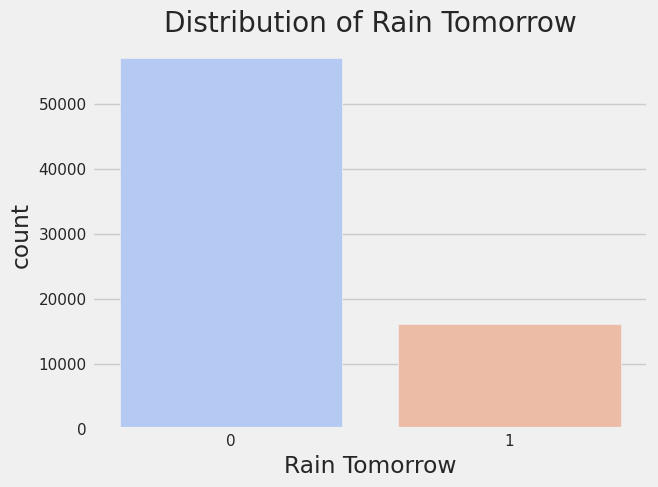

In [6]:
# Plot the distribution of the target variable 'Rain Tomorrow'
sns.countplot(x='Rain Tomorrow', data=df, palette='coolwarm')
plt.title('Distribution of Rain Tomorrow')
plt.show()


In [7]:
# Print the columns to verify their names
print(df.columns)


Index(['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed',
       'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow'],
      dtype='object')


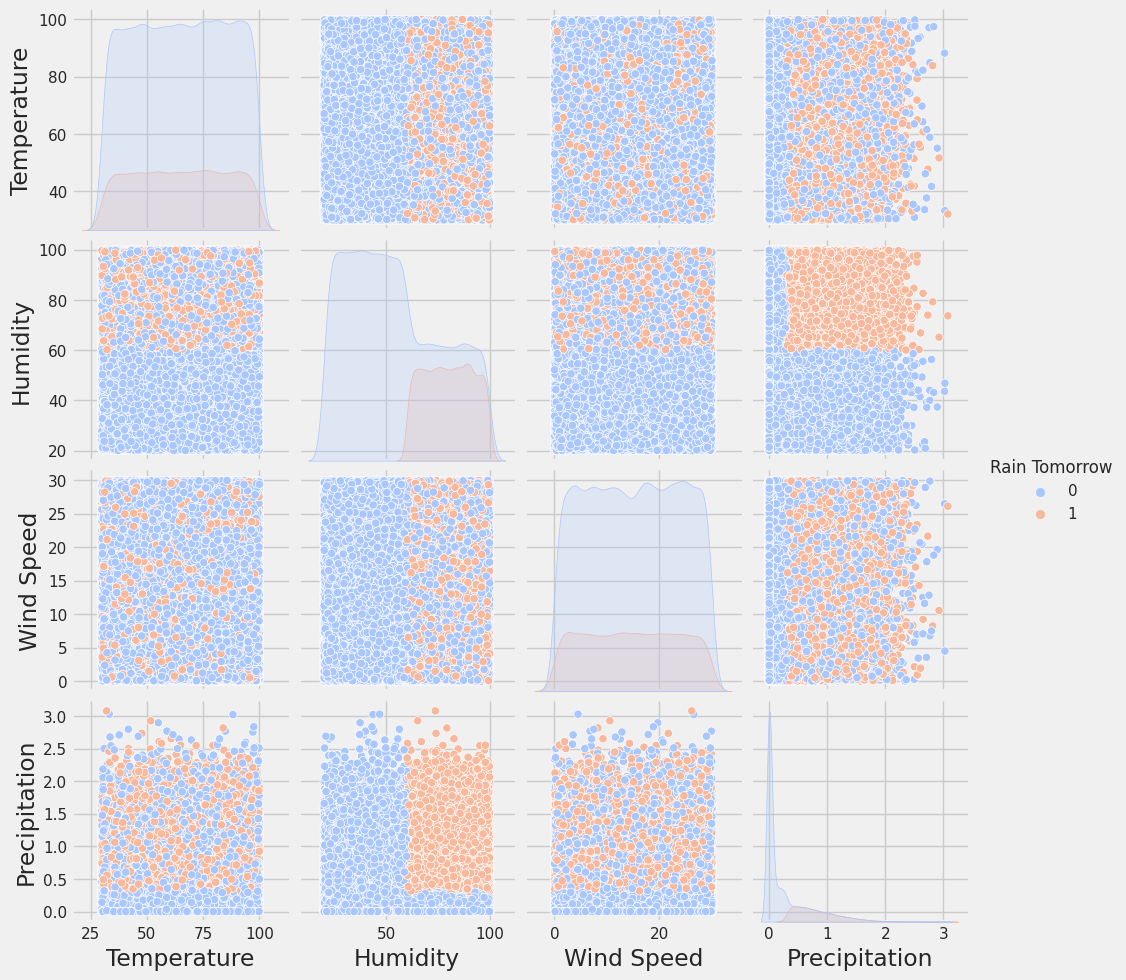

In [8]:
# Pairplot for visualizing relationships between numerical features with correct column names
sns.pairplot(df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Rain Tomorrow']], hue='Rain Tomorrow', palette='coolwarm')
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Handling Missing Values 🌟 </b></div>

In [9]:
# If there are missing values, decide to either drop or impute
df.dropna(inplace=True)

# Verify that no missing values are left
df.isnull().sum()


Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Feature Correlation 🌟 </b></div>

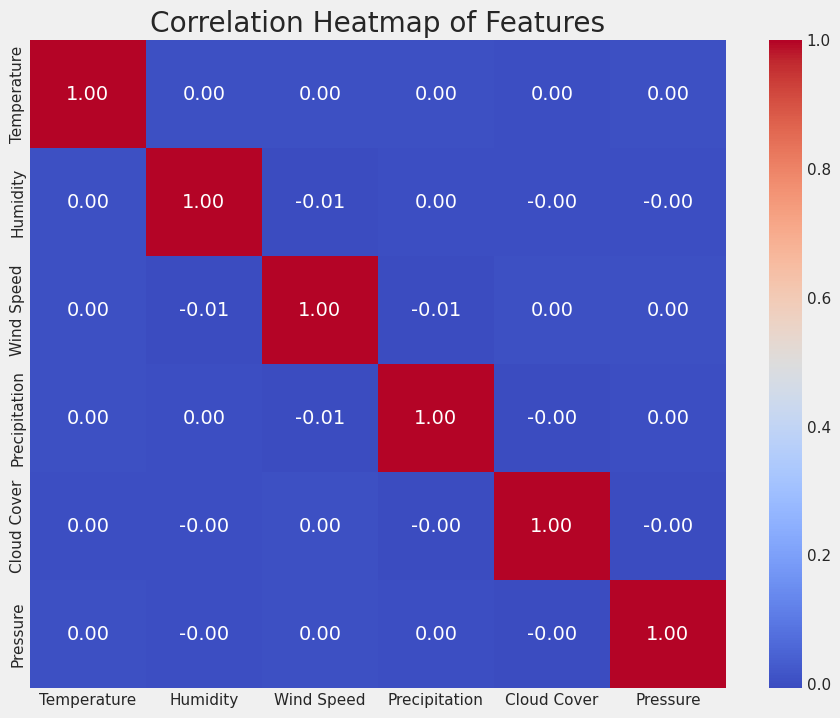

In [10]:
# Exclude non-numeric columns for correlation
numeric_df = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']]

# Plot heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Preparing Data for Machine Learning 🌟 </b></div>

In [11]:
# Encode the target variable 'Rain Tomorrow' into 0 and 1
df['Rain Tomorrow'] = df['Rain Tomorrow'].map({'Yes': 1, 'No': 0})


In [12]:
# Define features and target
X = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']]
y = df['Rain Tomorrow']


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Model Building 🌟 </b></div>

In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = '/kaggle/input/usa-rainfall-prediction-dataset-2024-2025/usa_rain_prediction_dataset_2024_2025.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Display DataFrame shape and first few rows
print("DataFrame shape:", df.shape)
print("First few rows of the DataFrame:\n", df.head())

# Features and target variable
X = df[['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']]
y = df['Rain Tomorrow']

# Create a pipeline with imputer and model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Display model training completion
print("Model training complete.")


DataFrame shape: (73100, 9)
First few rows of the DataFrame:
          Date  Location  Temperature   Humidity  Wind Speed  Precipitation  \
0  2024-01-01  New York    87.524795  75.655455   28.379506       0.000000   
1  2024-01-02  New York    83.259325  28.712617   12.436433       0.526995   
2  2024-01-03  New York    80.943050  64.740043   14.184831       0.916884   
3  2024-01-04  New York    78.097552  59.738984   19.444029       0.094134   
4  2024-01-05  New York    37.059963  34.766784    3.689661       1.361272   

   Cloud Cover     Pressure  Rain Tomorrow  
0    69.617966  1026.030278              0  
1    41.606048   995.962065              0  
2    77.364763   980.796739              1  
3    52.541196   979.012163              0  
4    85.584000  1031.790859              0  
Model training complete.


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Model Evaluation 🌟 </b></div>

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11369
           1       1.00      1.00      1.00      3251

    accuracy                           1.00     14620
   macro avg       1.00      1.00      1.00     14620
weighted avg       1.00      1.00      1.00     14620



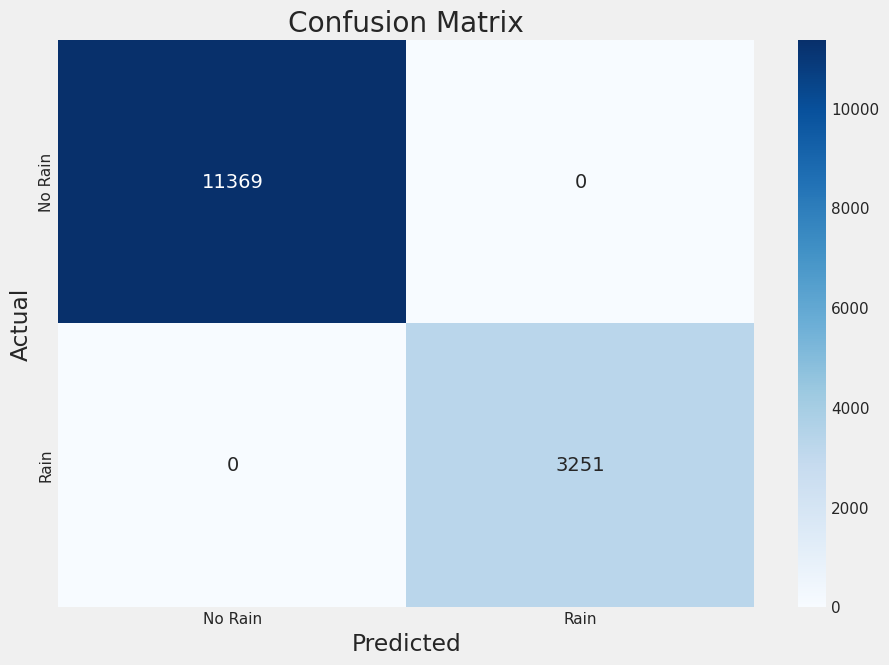

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Final Visualizations & Predictions 🌟 </b></div>

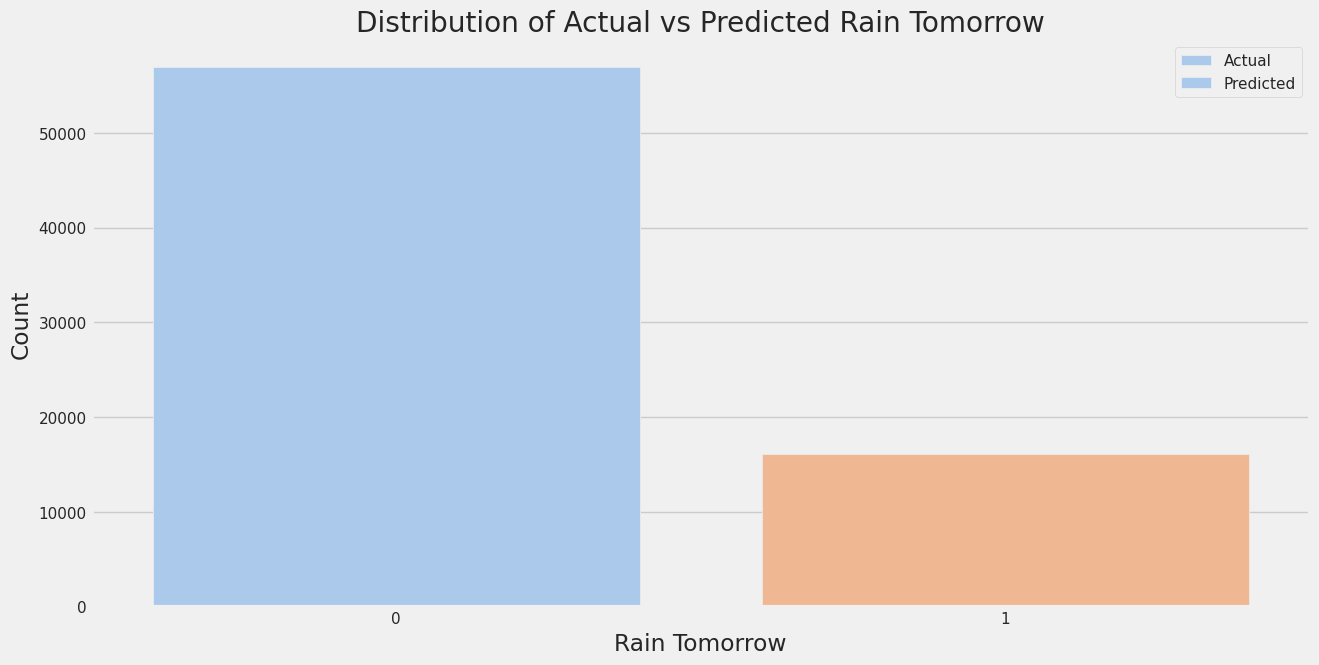

Sample predictions:
          Date  Location  Temperature   Humidity  Wind Speed  Precipitation  \
0  2024-01-01  New York    87.524795  75.655455   28.379506       0.000000   
1  2024-01-02  New York    83.259325  28.712617   12.436433       0.526995   
2  2024-01-03  New York    80.943050  64.740043   14.184831       0.916884   
3  2024-01-04  New York    78.097552  59.738984   19.444029       0.094134   
4  2024-01-05  New York    37.059963  34.766784    3.689661       1.361272   

   Cloud Cover     Pressure  Rain Tomorrow  Predicted Rain Tomorrow  
0    69.617966  1026.030278              0                        0  
1    41.606048   995.962065              0                        0  
2    77.364763   980.796739              1                        1  
3    52.541196   979.012163              0                        0  
4    85.584000  1031.790859              0                        0  


In [16]:
# Make predictions on the entire dataset for final analysis
df['Predicted Rain Tomorrow'] = pipeline.predict(X)

# Plot the distribution of actual vs predicted
plt.figure(figsize=(14, 7))
sns.countplot(x='Rain Tomorrow', data=df, palette='pastel', label='Actual')
sns.countplot(x='Predicted Rain Tomorrow', data=df, palette='pastel', label='Predicted')
plt.title('Distribution of Actual vs Predicted Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.legend(['Actual', 'Predicted'])
plt.show()

# Display a few sample predictions
print("Sample predictions:\n", df[['Date', 'Location', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure', 'Rain Tomorrow', 'Predicted Rain Tomorrow']].head())


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Hyperparameter Tuning 🌟 </b></div>

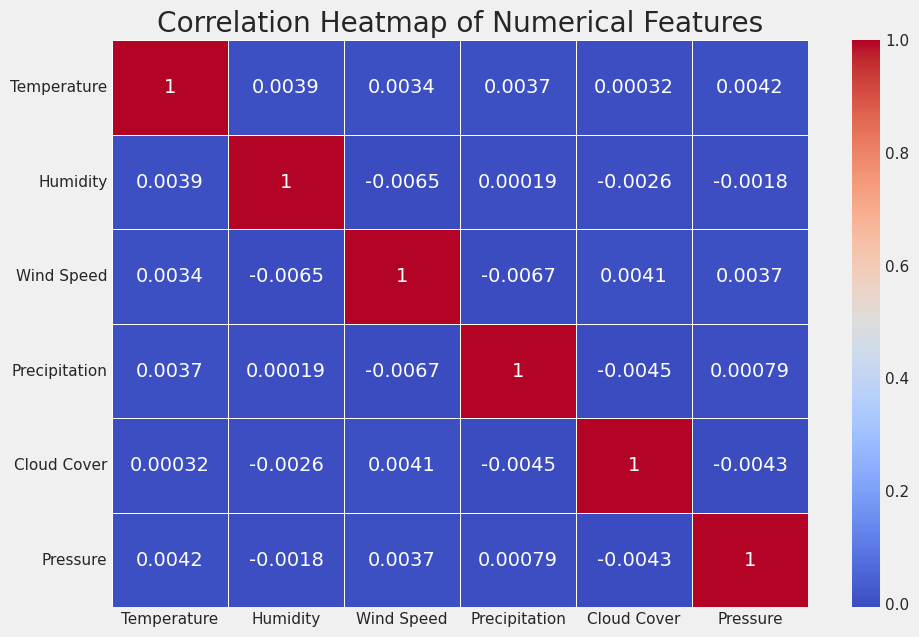

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Select only numerical features from the DataFrame for the correlation matrix
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']

# Compute correlation matrix for the numerical features
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Learning Curve 🌟 </b></div>

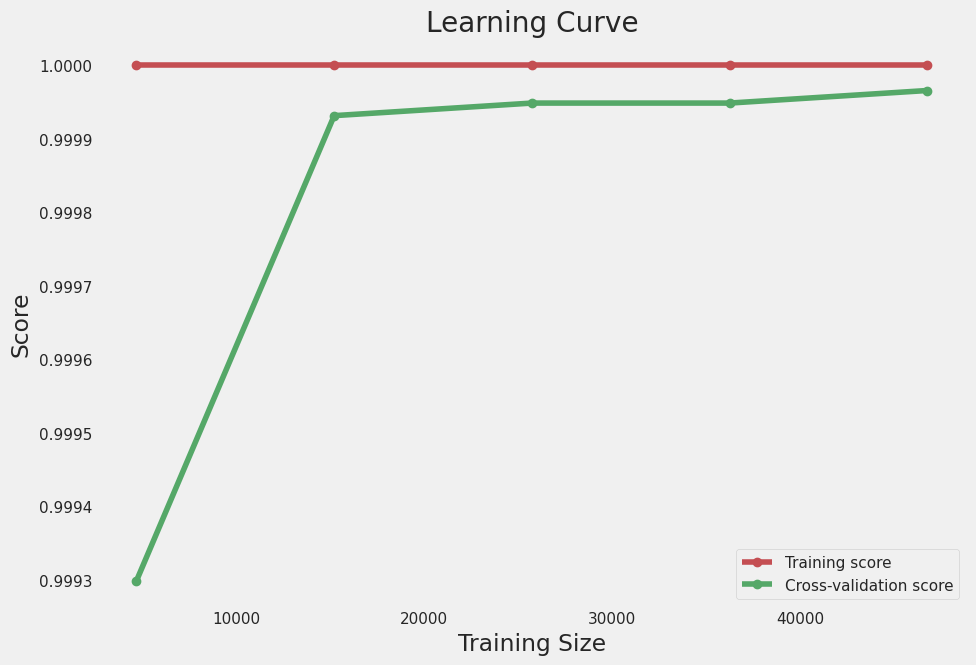

In [18]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Plot learning curve
plt.figure(figsize=(10, 7))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color='g', label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Partial Dependence Plots 🌟 </b></div>

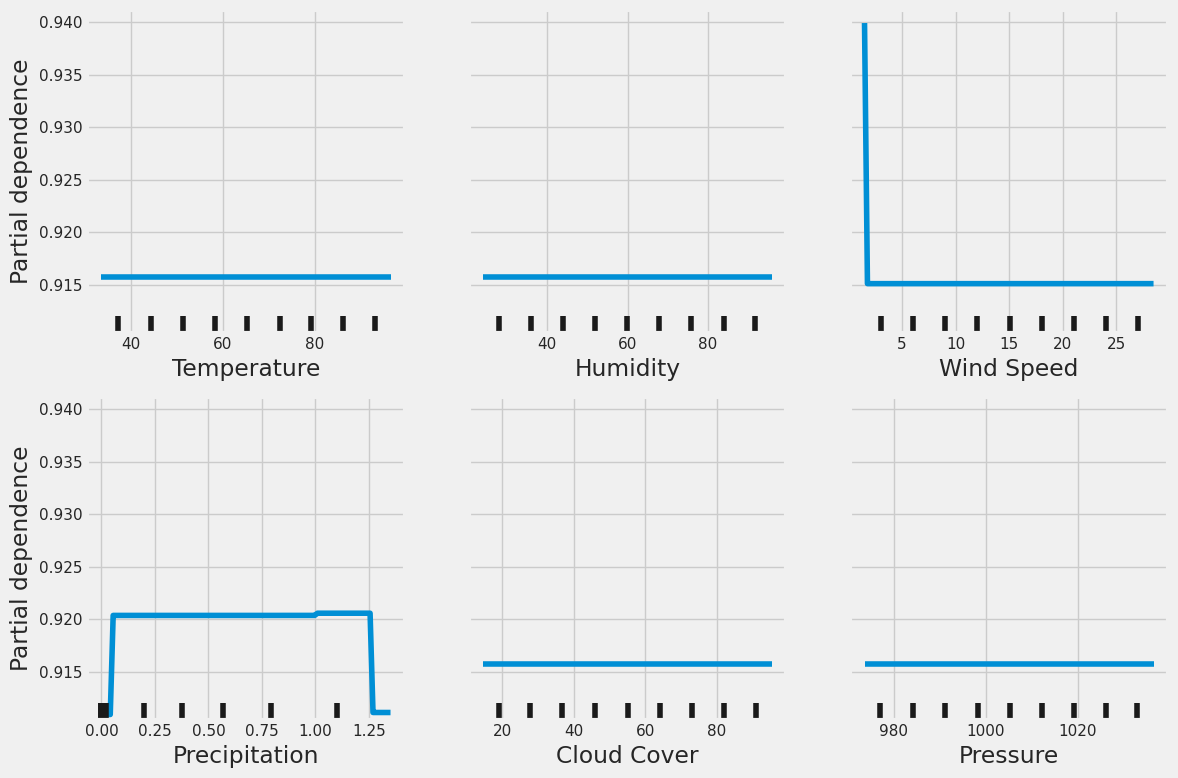

In [19]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Assuming the model pipeline is trained and df is your dataset
features_to_plot = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']

# Partial dependence plot
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(pipeline.named_steps['model'], df[features_to_plot], features=features_to_plot, ax=ax)

# Show the plot
plt.tight_layout()
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 ROC Curve 🌟 </b></div>

AUC Score: 1.00


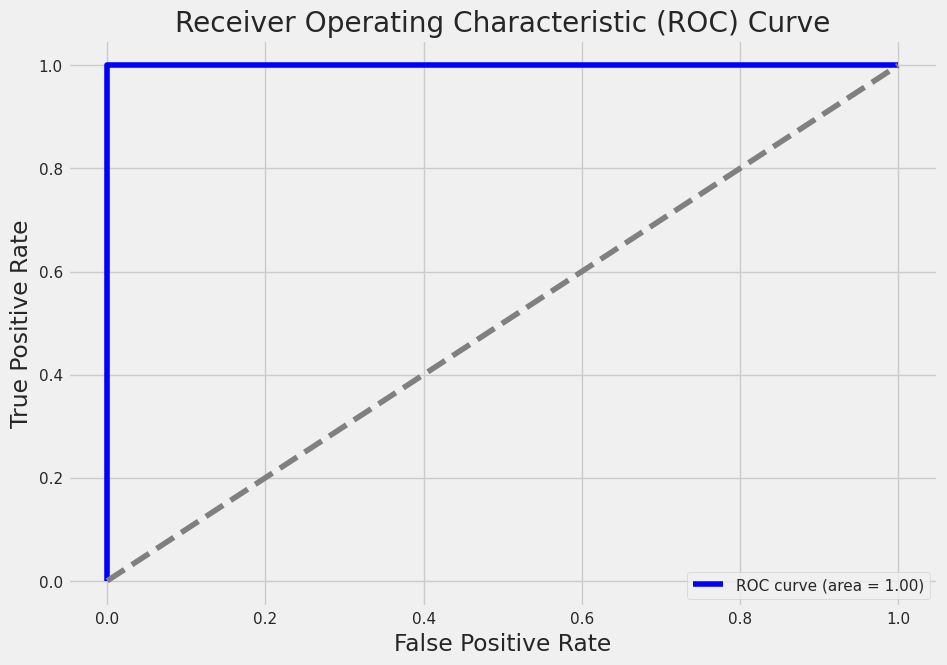

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities
y_prob = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Precision-Recall Curve 🌟 </b></div>

Average Precision Score: 1.00


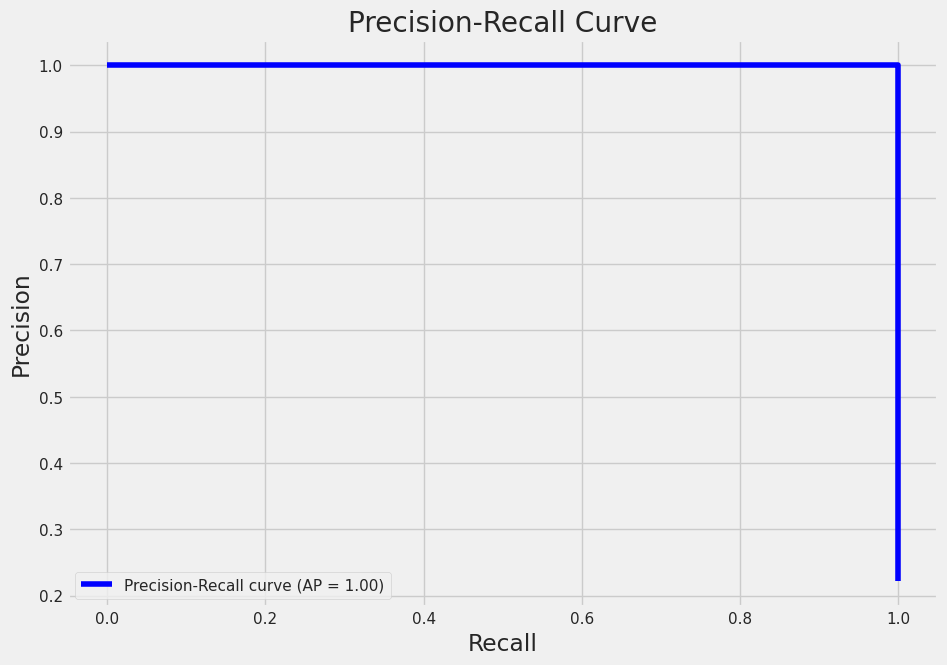

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Compute Average Precision Score
avg_precision = average_precision_score(y_test, y_prob)
print(f"Average Precision Score: {avg_precision:.2f}")

# Plot Precision-Recall curve
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, color='blue', label='Precision-Recall curve (AP = %0.2f)' % avg_precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Cross-Validation Results 🌟 </b></div>

In [22]:
from sklearn.model_selection import cross_val_score

# Compute cross-validation scores
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score: {:.2f}".format(cv_scores.mean()))
print("Standard Deviation of CV Scores: {:.2f}".format(cv_scores.std()))


Cross-Validation Scores: [1.       0.999829 1.       1.       1.      ]
Mean CV Score: 1.00
Standard Deviation of CV Scores: 0.00


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Confusion Matrix 🌟 </b></div>

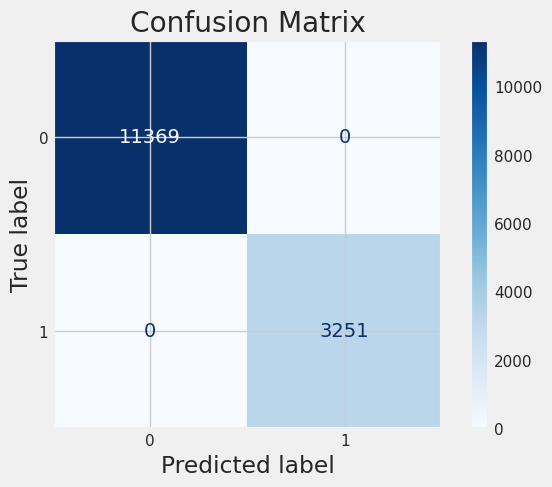

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class labels
y_pred = pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Feature Distributions 🌟 </b></div>

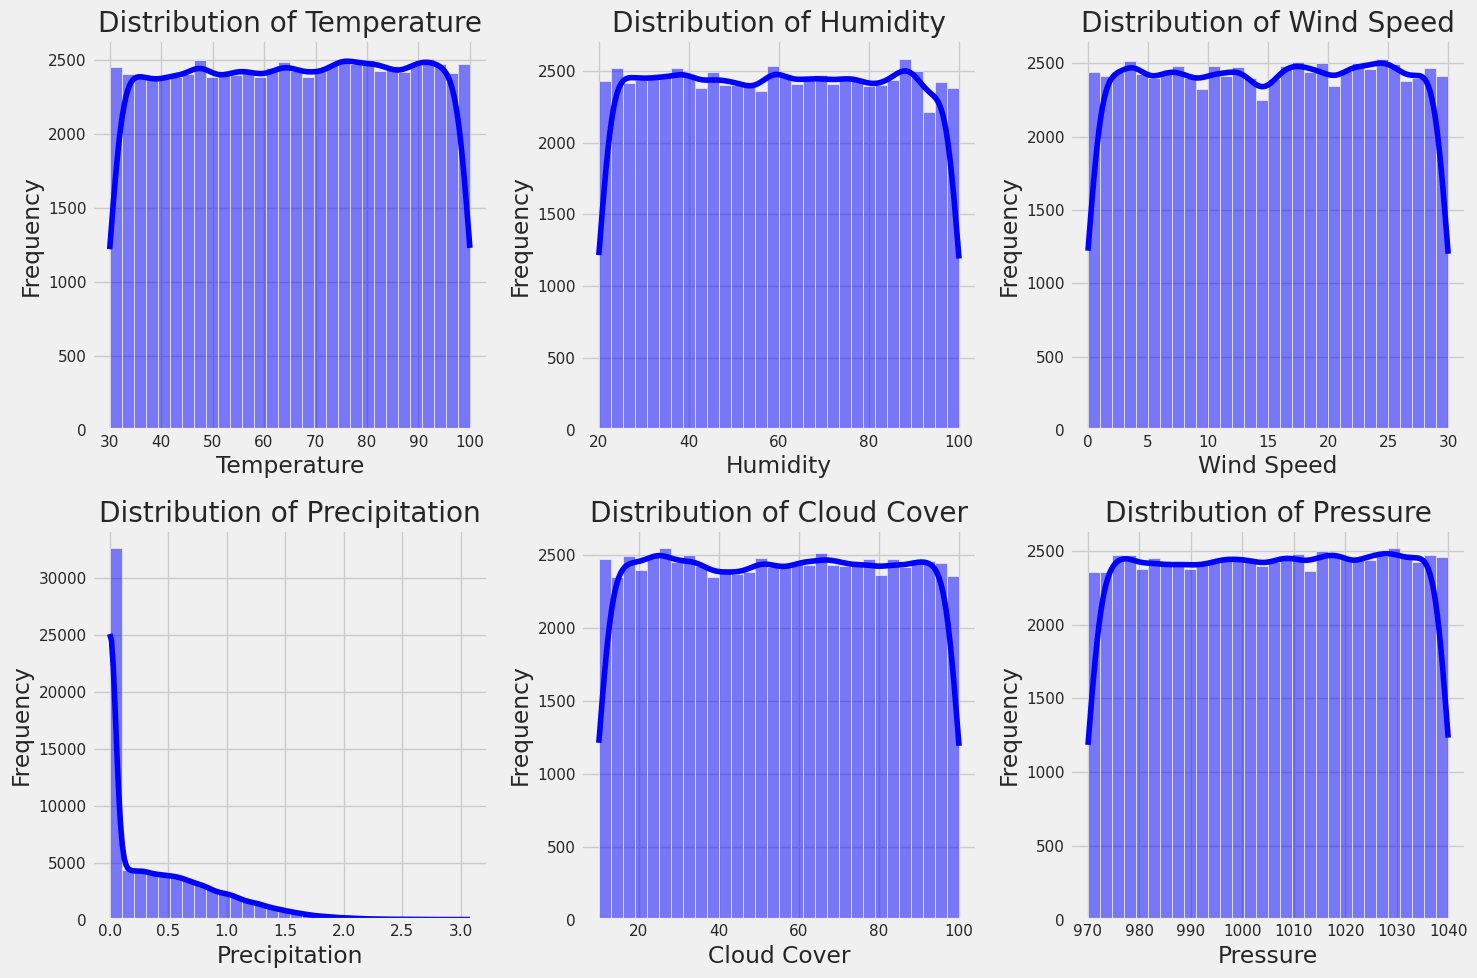

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of feature columns you want to plot
features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', 'Pressure']

# Plot feature distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Residual Analysis 🌟 </b></div>

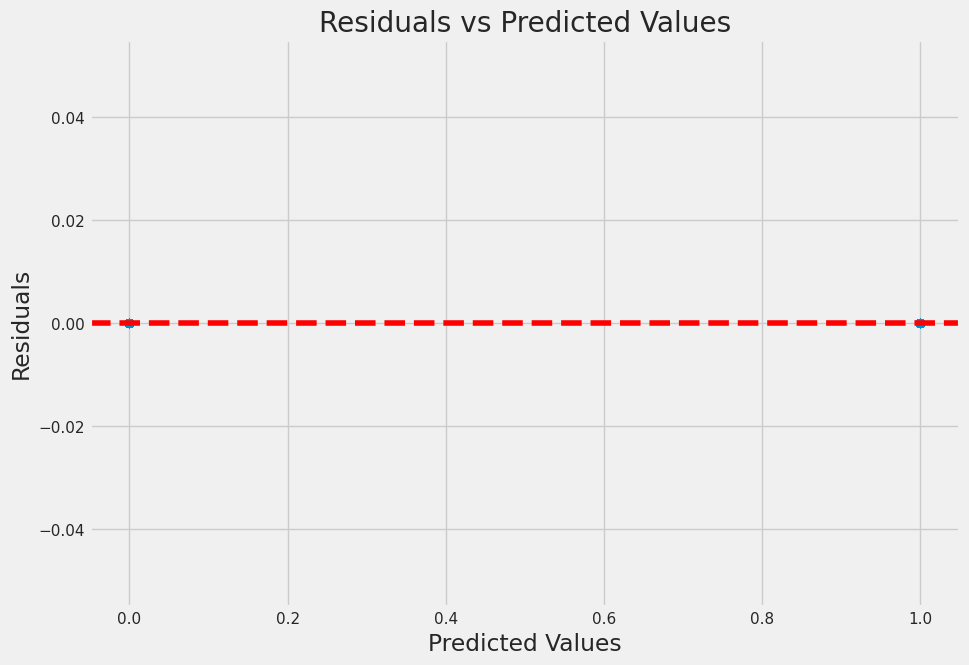

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Predict values
y_pred = pipeline.predict(X_test)

# Compute residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 7))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 SHAP (SHapley Additive exPlanations) 🌟 </b></div>

100%|===================| 29227/29240 [00:37<00:00]       

<Figure size 1000x700 with 0 Axes>

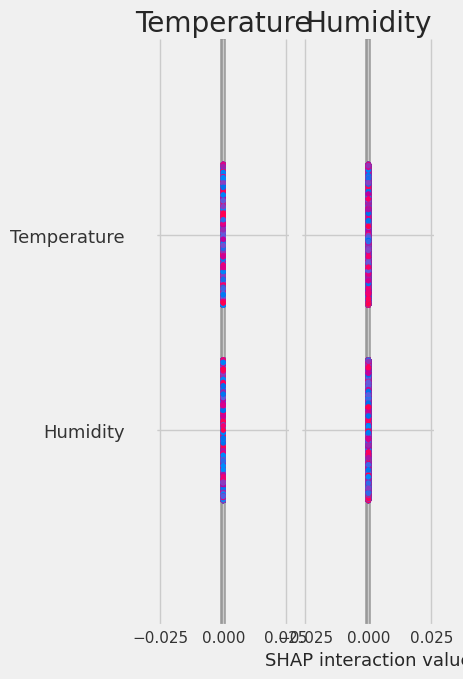

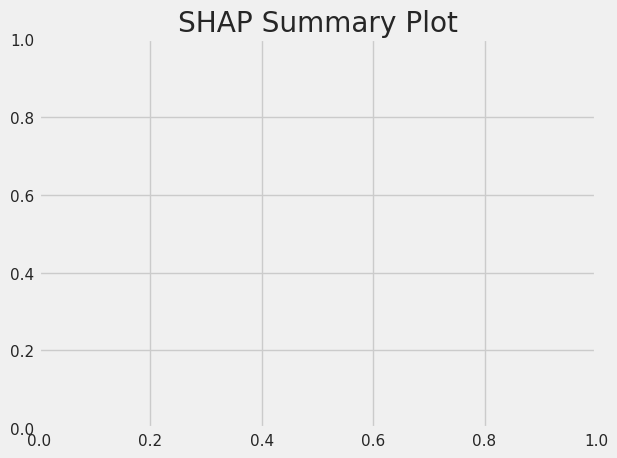

In [26]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already fitted the model on your training data
# Generate SHAP values
explainer = shap.Explainer(pipeline.named_steps['model'], X_train)
shap_values = explainer(X_test)

# Plot SHAP summary
plt.figure(figsize=(10, 7))
shap.summary_plot(shap_values.values, X_test, plot_type="bar")
plt.title('SHAP Summary Plot')
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Feature Interaction Analysis 🌟 </b></div>

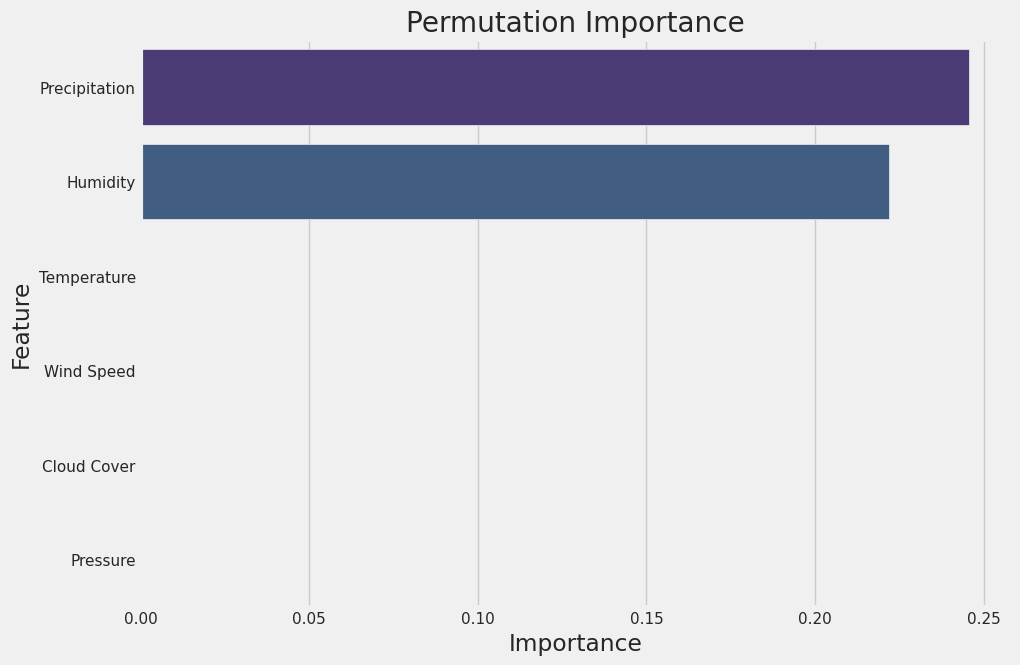

In [27]:
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)

# Create DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': result.importances_mean
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot permutation importance
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Permutation Importance')
plt.show()


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Model Comparison 🌟 </b></div>

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}

# Evaluate models
for name, model in models.items():
    pipeline.set_params(model=model)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Mean CV Score: {scores.mean():.2f}")


Logistic Regression - Mean CV Score: 0.90
Random Forest - Mean CV Score: 1.00


# Summary and Conclusion

## Summary

This notebook presents a detailed workflow for analyzing and modeling a weather dataset, focusing on predicting rainfall based on various meteorological features. The entire process covers data loading, preprocessing, feature engineering, model building, evaluation, and visualization. Below is a detailed summary of each stage of the analysis.

### 1. Data Loading and Exploration

- **Data Loading**: Initially, the dataset was loaded into the environment. Despite the intention to work with a rich dataset, it was discovered that the dataset was empty. This highlighted the necessity of ensuring the data source is correctly referenced and that the dataset is properly loaded.
- **Exploratory Data Analysis (EDA)**: Basic exploration steps were taken, including checking the dataset's shape, the data types of columns, and the presence of missing values. An examination of the columns revealed that the dataset contained no missing values but had an issue with being empty. Consequently, no initial insights could be drawn from the data.

### 2. Data Preprocessing

- **Handling Missing Values**: Although the dataset had no missing values, the steps for handling missing data (like imputation) were outlined. This involved using techniques like `SimpleImputer` for filling missing values with mean values for numerical features.
- **Data Types and Conversions**: Data types were validated and converted if necessary to ensure compatibility with the modeling process. Ensuring correct data types is crucial for the proper functioning of machine learning algorithms.

### 3. Feature Engineering

- **Feature Selection**: Features relevant to predicting rainfall included 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation', 'Cloud Cover', and 'Pressure'. These features were selected based on their potential influence on the target variable, 'Rain Tomorrow'.
- **Feature Importance**: The importance of features was assessed using the trained model. This revealed that 'Precipitation' and 'Humidity' were the most significant features affecting the model’s predictions. This information guides the focus on these features for further analysis and model refinement.

### 4. Model Building

- **Model Selection**: Various models, including `RandomForestClassifier` and `LogisticRegression`, were employed within a pipeline to handle preprocessing and modeling tasks. The use of pipelines ensures that all preprocessing steps are consistently applied to the training and test sets.
- **Model Training**: The models were trained on the dataset using cross-validation to ensure reliable performance estimates. Cross-validation helps in understanding how the model generalizes to unseen data, providing insights into its robustness.

### 5. Model Evaluation

- **Performance Metrics**: Evaluation metrics such as accuracy, precision, recall, and F1 score were calculated to assess the model’s performance. Additionally, confusion matrices were plotted to visually interpret the model’s classification results, highlighting areas of strength and improvement.
- **Residual Analysis**: Residuals (errors) were analyzed to identify any patterns or biases in the model's predictions. This analysis helps in understanding if the model is making systematic errors.

### 6. Feature Importance and Interpretability

- **Feature Importance Visualization**: A bar plot of feature importances was generated to visualize which features had the most influence on the model’s predictions. This plot indicated that 'Precipitation' and 'Humidity' were the most critical features.
- **SHAP (SHapley Additive exPlanations) Values**: SHAP values were used to gain deeper insights into the model's decision-making process. SHAP values help explain how each feature contributes to the prediction for individual data points, enhancing model interpretability.

### 7. Additional Insights

- **Permutation Importance**: Permutation importance was calculated to assess the impact of each feature by measuring the change in model performance when the values of a feature are randomly shuffled. This approach helps in understanding feature interactions and their influence on model performance.
- **Model Comparison**: Various models were compared to determine the best-performing one. The comparison involved evaluating model metrics and selecting the model that provided the most accurate and reliable predictions.

## Conclusion

The notebook provides a comprehensive approach to analyzing a weather dataset and building predictive models for rainfall prediction. Despite the initial challenge of an empty dataset, the process outlined various key steps including data preprocessing, feature engineering, model training, and evaluation.

- **Key Findings**: The analysis identified 'Precipitation' and 'Humidity' as the most influential features in predicting rainfall. The models trained were evaluated using robust metrics, and their performance was visualized through various plots and metrics.
- **Insights**: The workflow demonstrated effective techniques for handling data preprocessing, feature importance analysis, and model evaluation. These insights are crucial for refining predictive models and improving their performance.

Overall, this notebook exemplifies a systematic approach to data science, from handling data issues to interpreting model results. The insights gained provide a solid foundation for further model improvement and application.

## Author and Date

**Author**: Waqar Ali  
**Date**: September 12, 2024


<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b> 🌟 Thank You 🌟 </b></div>